# Water Quality Potability

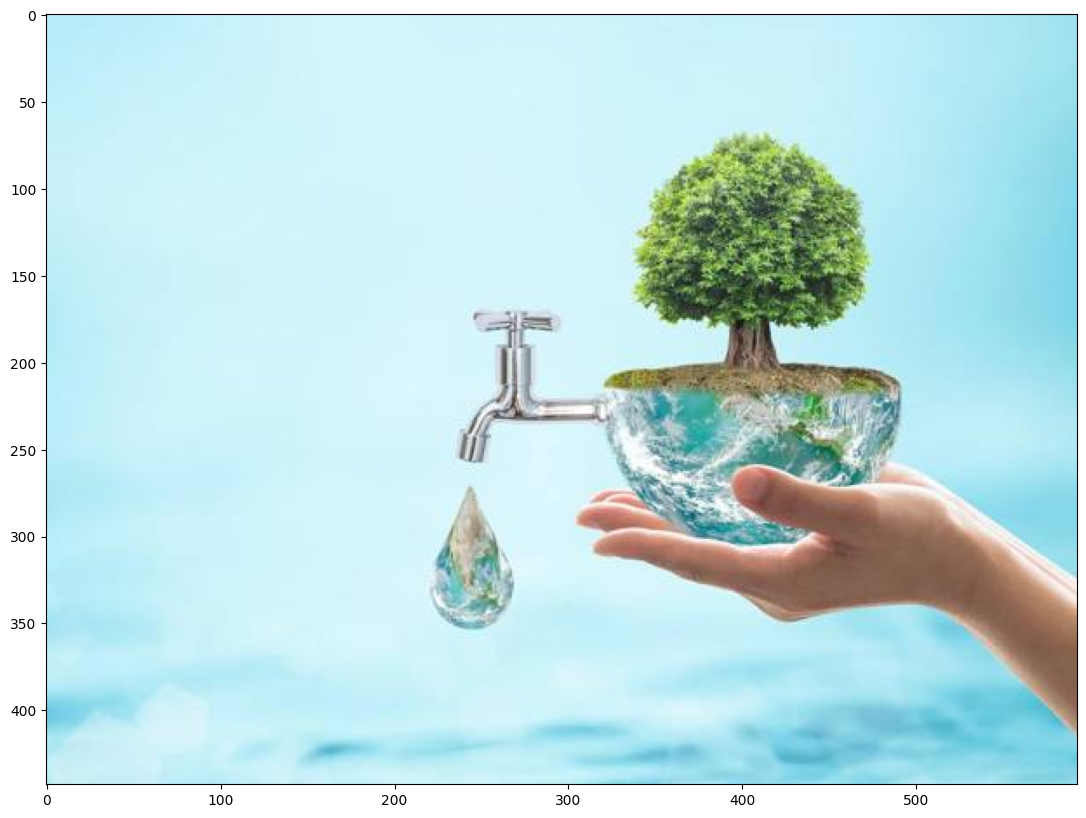

In [105]:
img = mpimg.imread('water.jpg')
imgplot = plt.imshow(img)
plt.show()

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

# Data Explanation

- ph: pH of 1. water (0 to 14).
- Hardness: Capacity of water to precipitate soap in mg/L
- Solids: Total dissolved solids in ppm.
- Chloramines: Amount of Chloramines in ppm.
- Sulfate: Amount of Sulfates dissolved in mg/L.
- Conductivity: Electrical conductivity of water in μS/cm.
- Organic_carbon: Amount of organic carbon in ppm.
- Trihalomethanes: Amount of Trihalomethanes in μg/L.
- Turbidity: Measure of light emiting property of water in NTU.
- Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

# Libraries import and data loading

In [ ]:
#cimbarcananahhhhhhhhhh

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [107]:
df = pd.read_csv("water_potability.csv")
df.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

In [108]:
df.info


<bound method DataFrame.info of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135

In [109]:
df.shape

(3276, 10)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Test statistici

In [111]:
df.describe().T

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

In [112]:
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

In [113]:
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

The mean and standard deviation of almost all features are similar for both samples. There are some small differences in the "Solids" feature.

# Exploratory Data Analysis

### Visualization of the feature "Potability"

Text(0.5, 1.0, 'Potability')

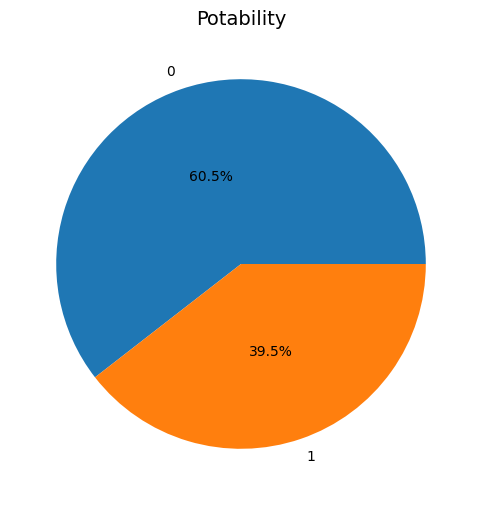

In [114]:
data = df.groupby("Potability")["ph"].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Potability", fontsize=14)

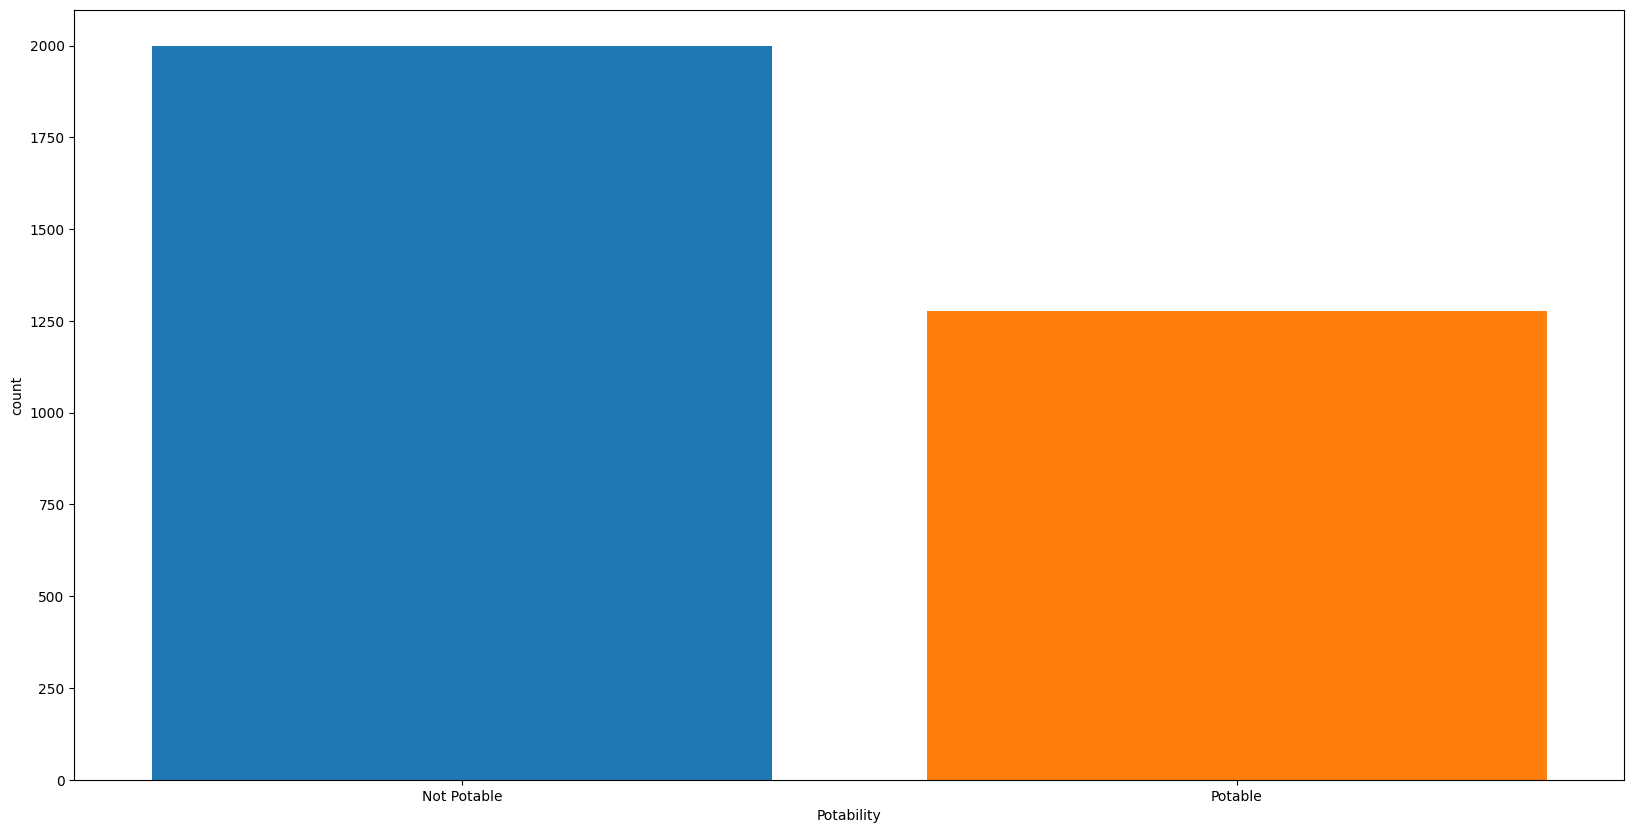

In [115]:
sns.countplot(x = 'Potability', data = df, saturation = 1)
plt.xticks(ticks = [0, 1], labels = ['Not Potable', 'Potable'])
plt.show()

<AxesSubplot: xlabel='Potability', ylabel='ph'>

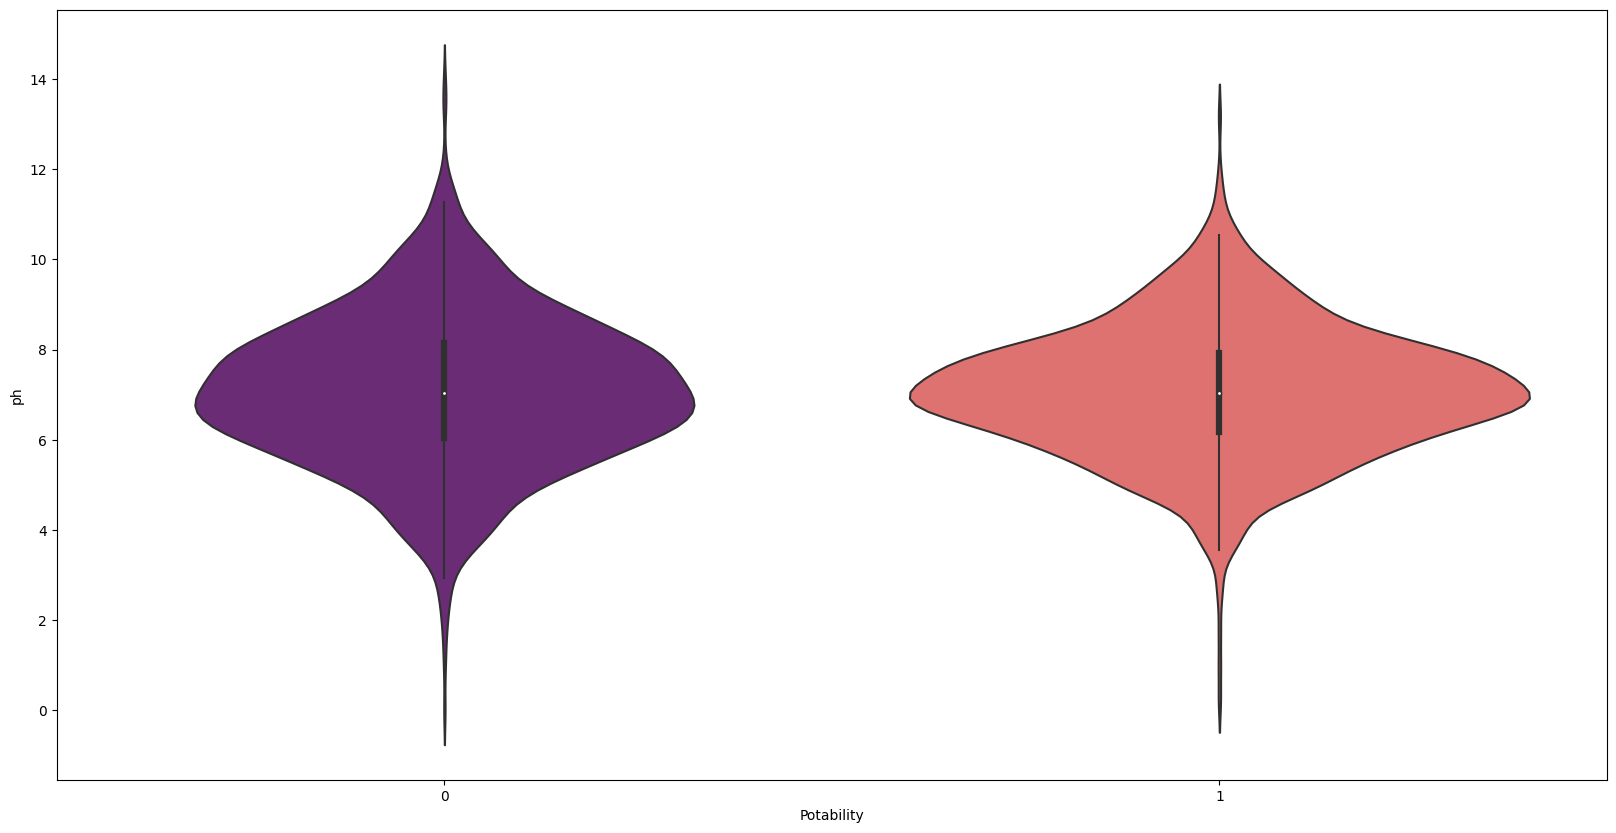

In [116]:
sns.violinplot(x = 'Potability', y = 'ph', data = df, palette = 'magma')

C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\2836938970.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Potability'])


<AxesSubplot: xlabel='Potability', ylabel='Density'>

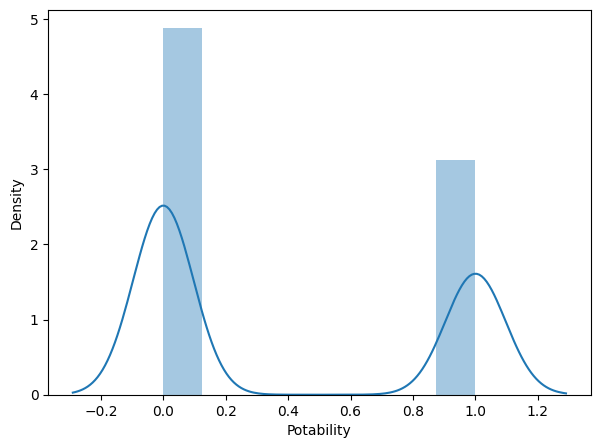

In [117]:
plt.figure(figsize = (7, 5))
sns.distplot(df['Potability'])

### Feature distribution analysis

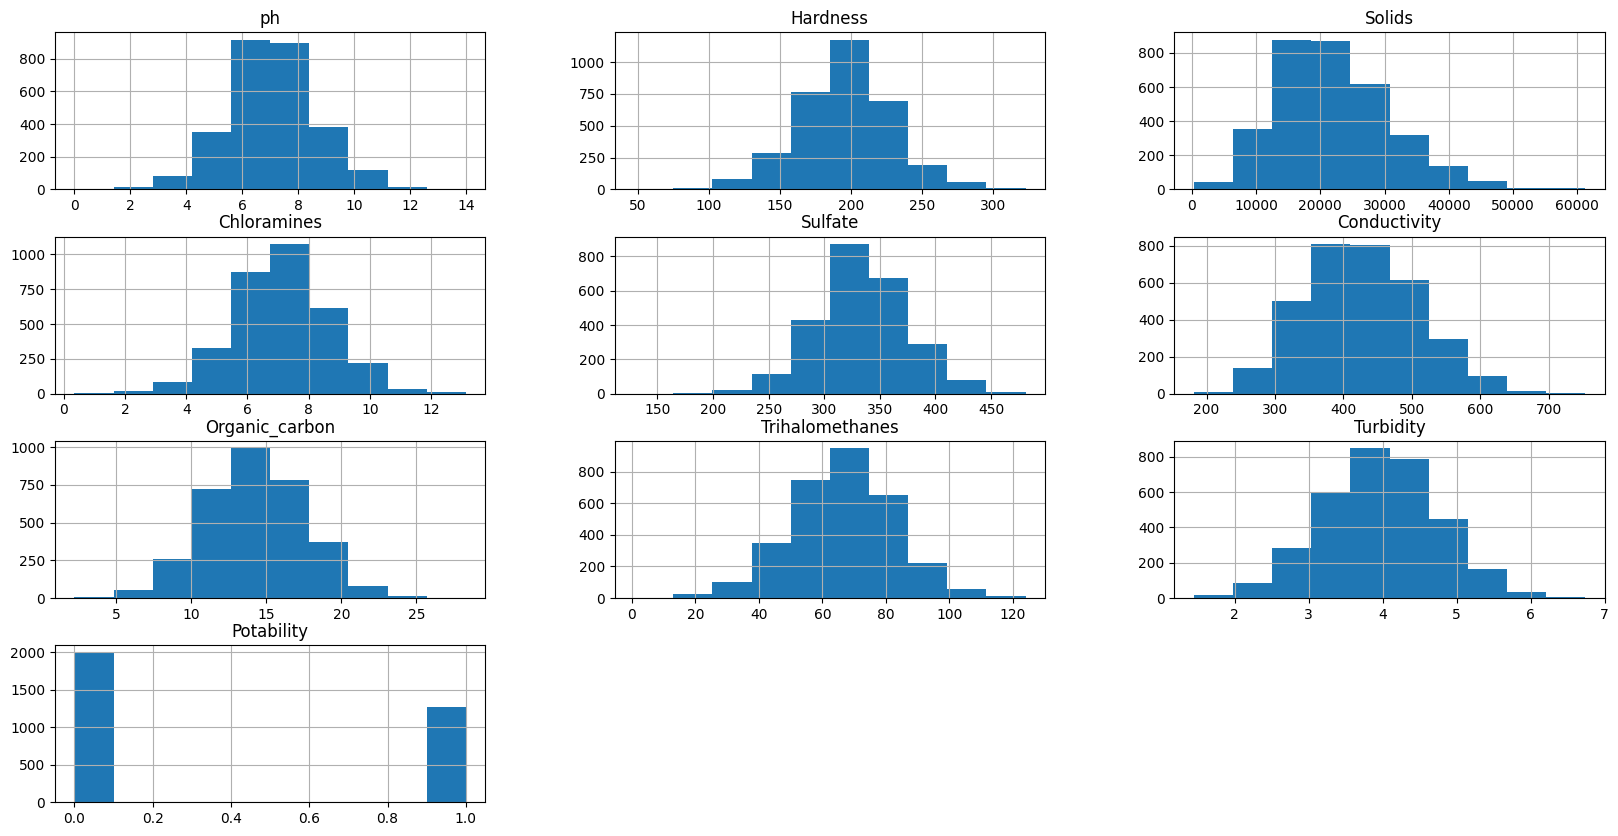

In [118]:
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()
# Except for the target column, all features have a normal distribution

In [119]:
cols = df.columns
cols

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

### Viewing outliers

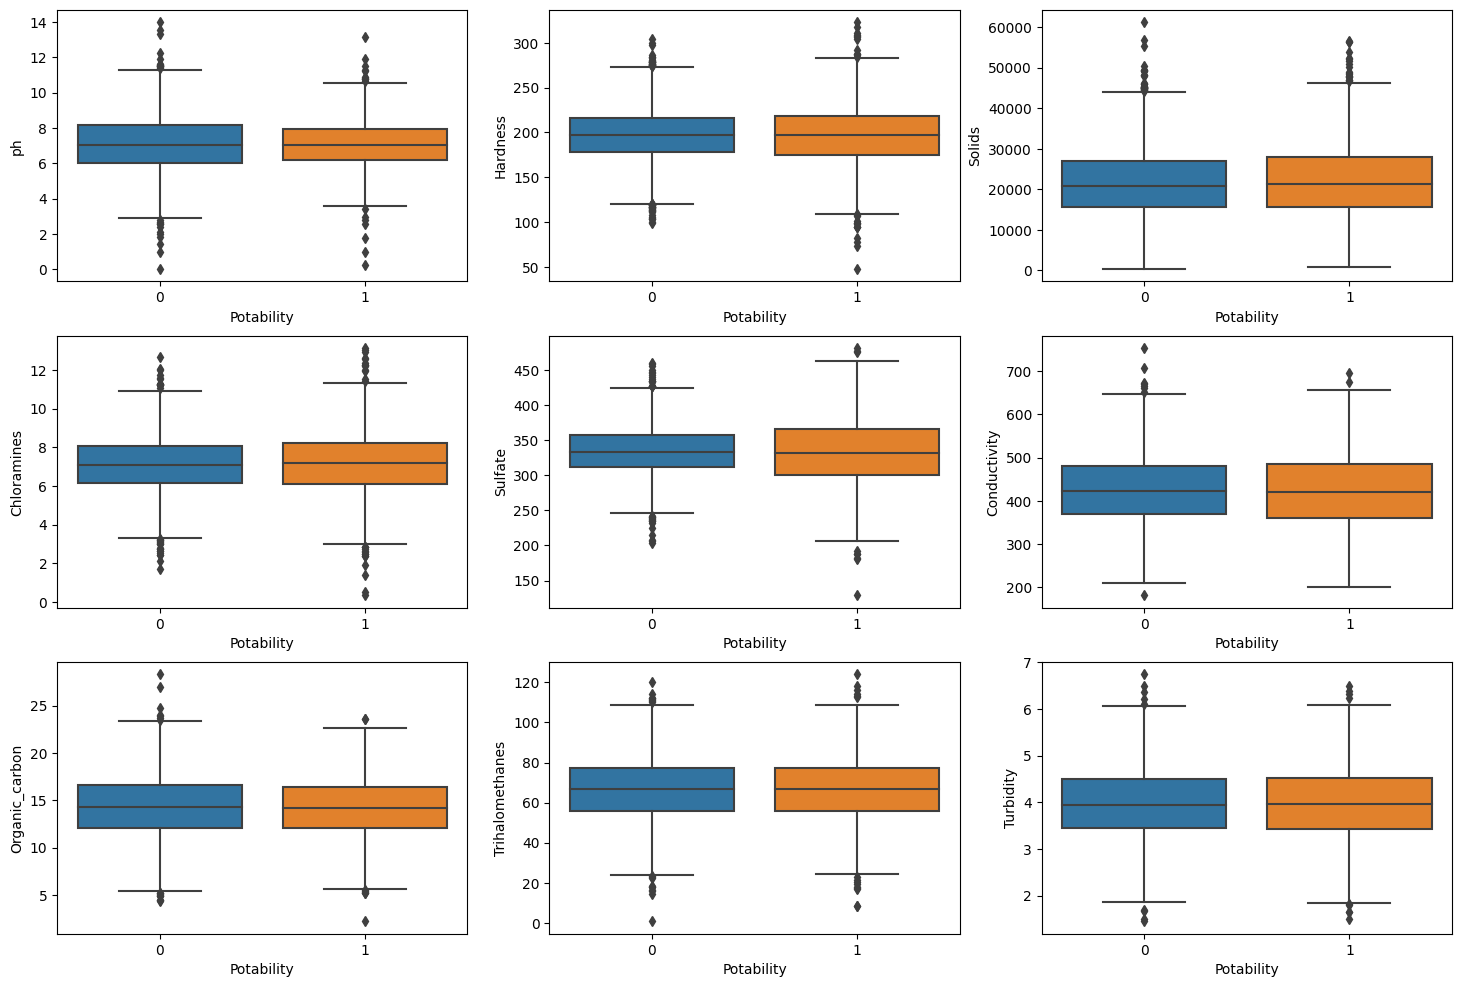

In [120]:
plt.figure(figsize=(18,12))
for i,j in zip(cols[:-1], range(len(cols)-1)):
    plt.subplot(3,3,j+1)
    sns.boxplot(x=df.Potability, y=df[i])
plt.show()

# The "Solids" feature has many outliers beyond the upper limit of the distribution

In [121]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [122]:
display(df[df["Potability"]==1].count())
(df[df["Potability"]==0].count())

ph                 1101
Hardness           1278
Solids             1278
Chloramines        1278
Sulfate             985
Conductivity       1278
Organic_carbon     1278
Trihalomethanes    1223
Turbidity          1278
Potability         1278
dtype: int64

ph                 1684
Hardness           1998
Solids             1998
Chloramines        1998
Sulfate            1510
Conductivity       1998
Organic_carbon     1998
Trihalomethanes    1891
Turbidity          1998
Potability         1998
dtype: int64

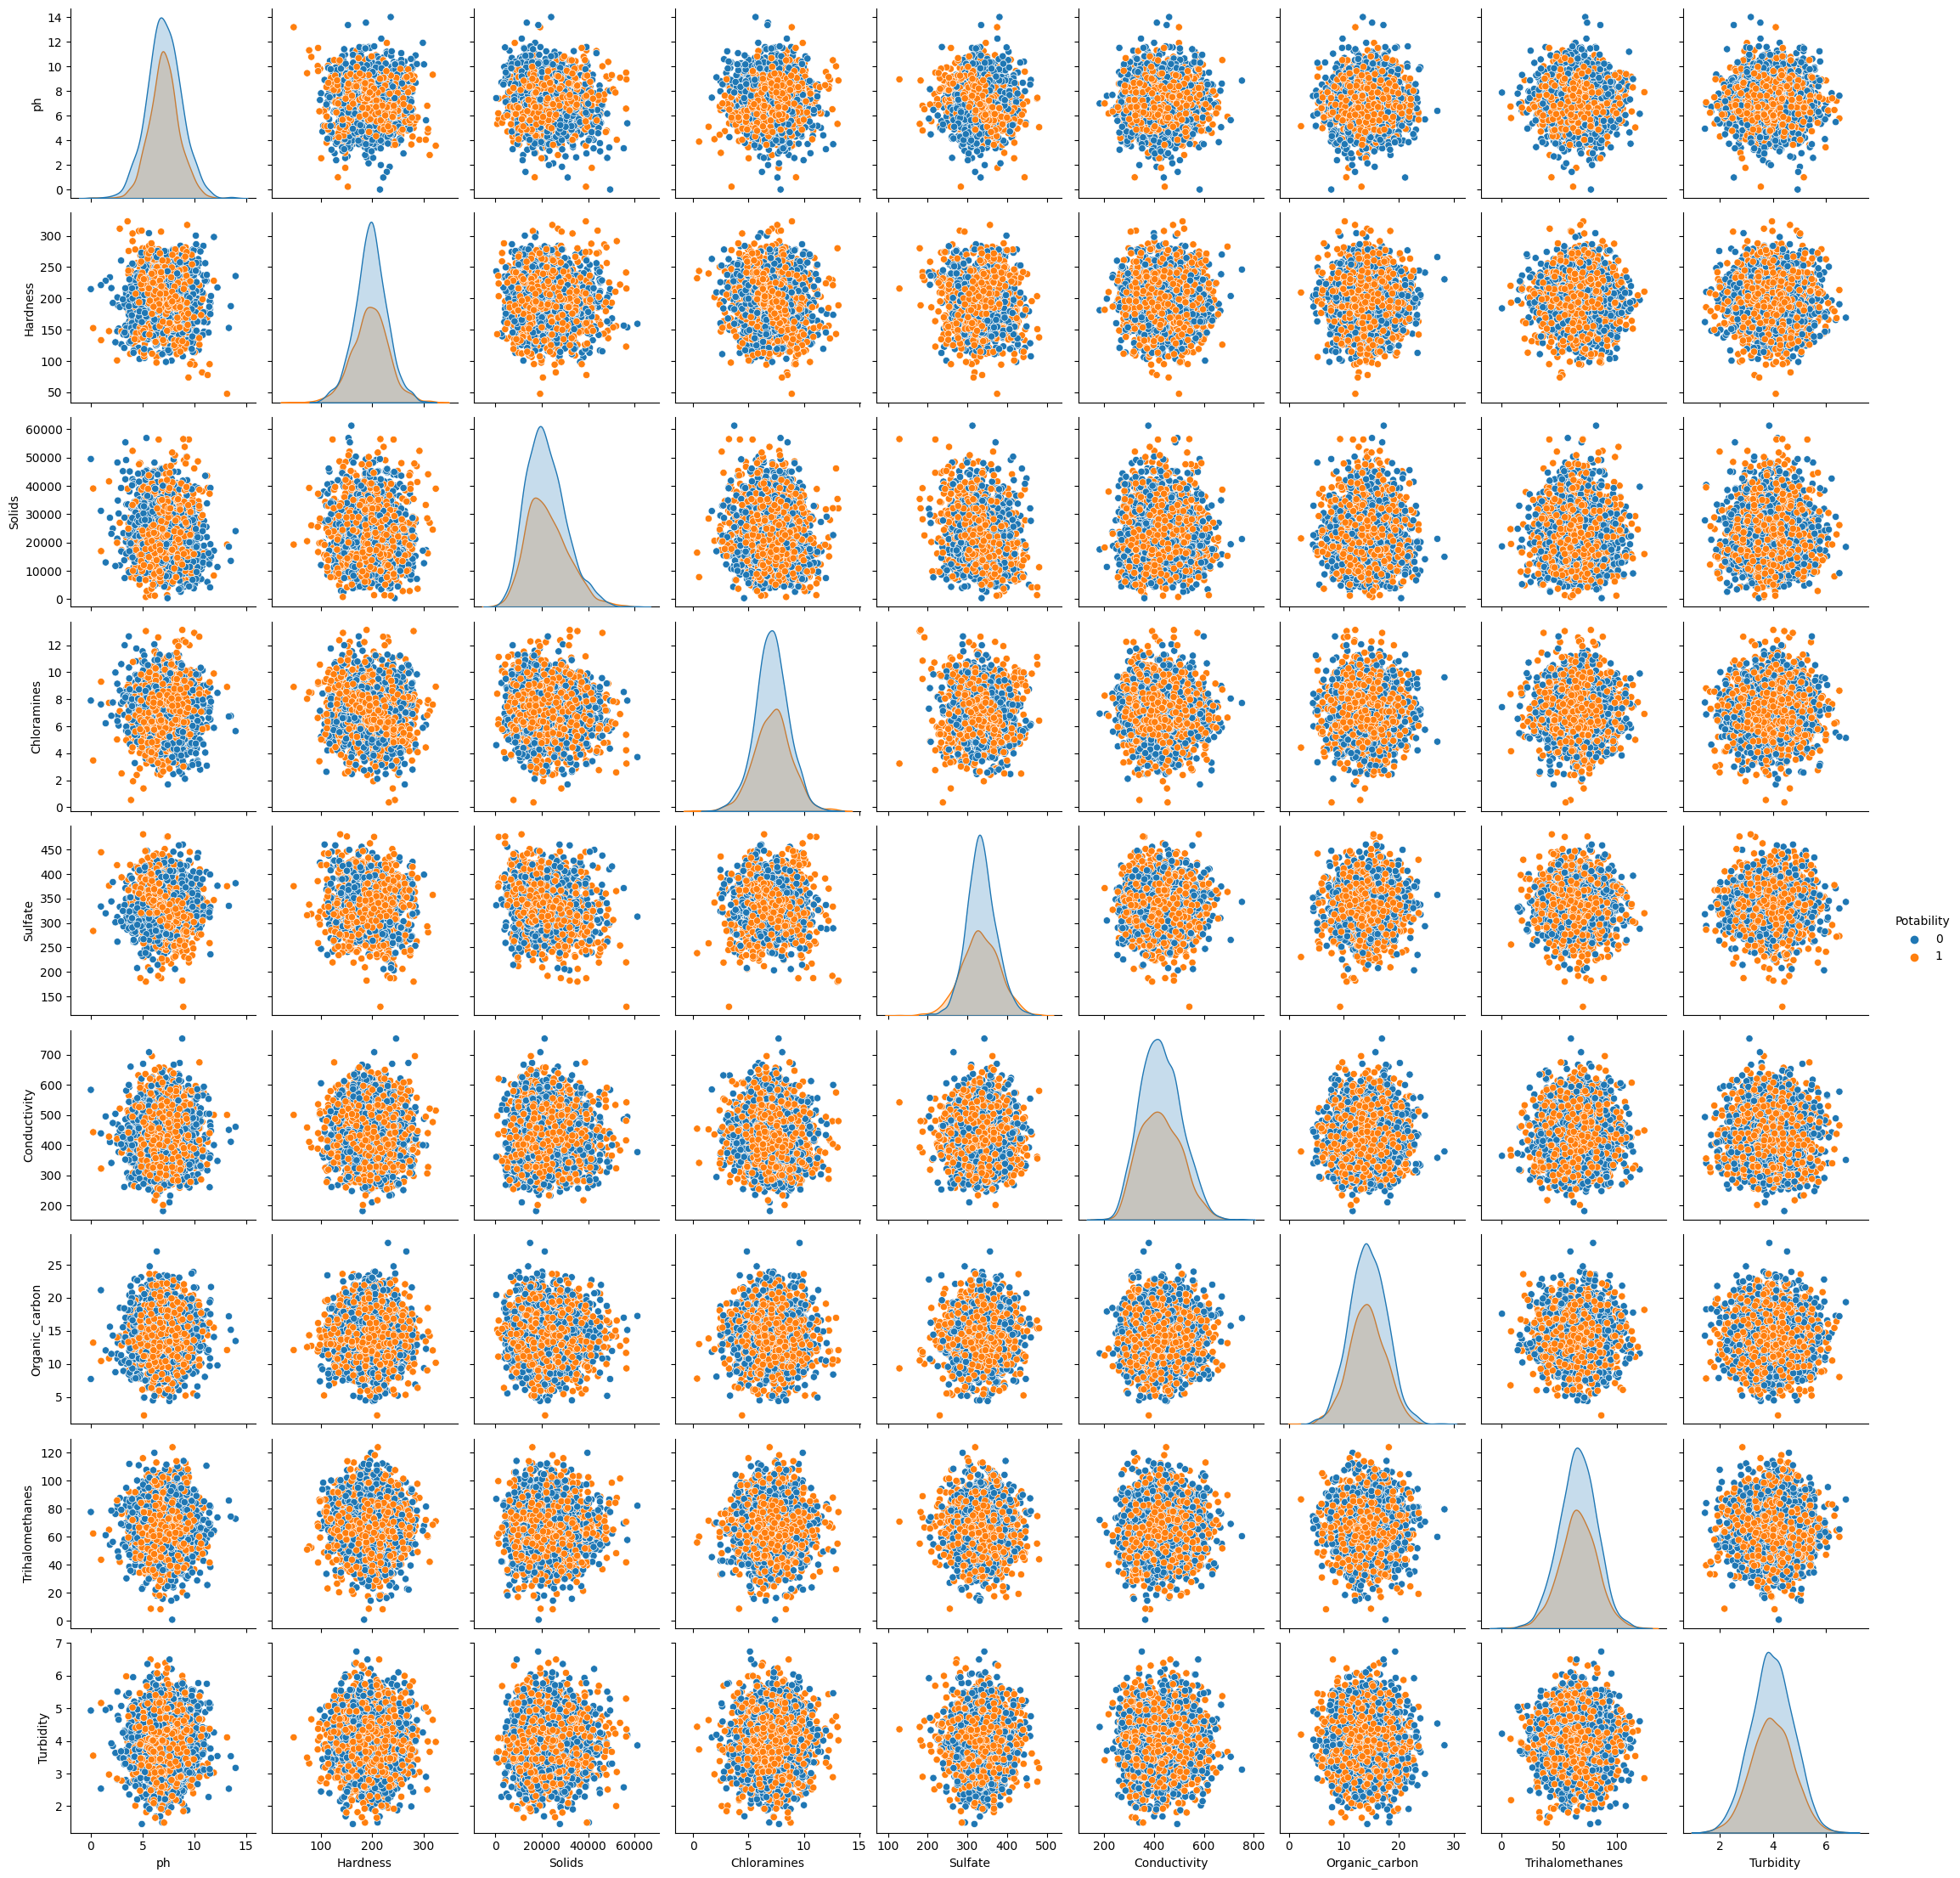

In [123]:

sns.pairplot(data=df, hue="Potability")
plt.show()

In [124]:
### the features exhibit a normal distribution
### Each feature is not well correlated with feature Potability

## Feature Engineering

### Filling Missing Values

Text(0, 0.5, 'Percentage of missing values')

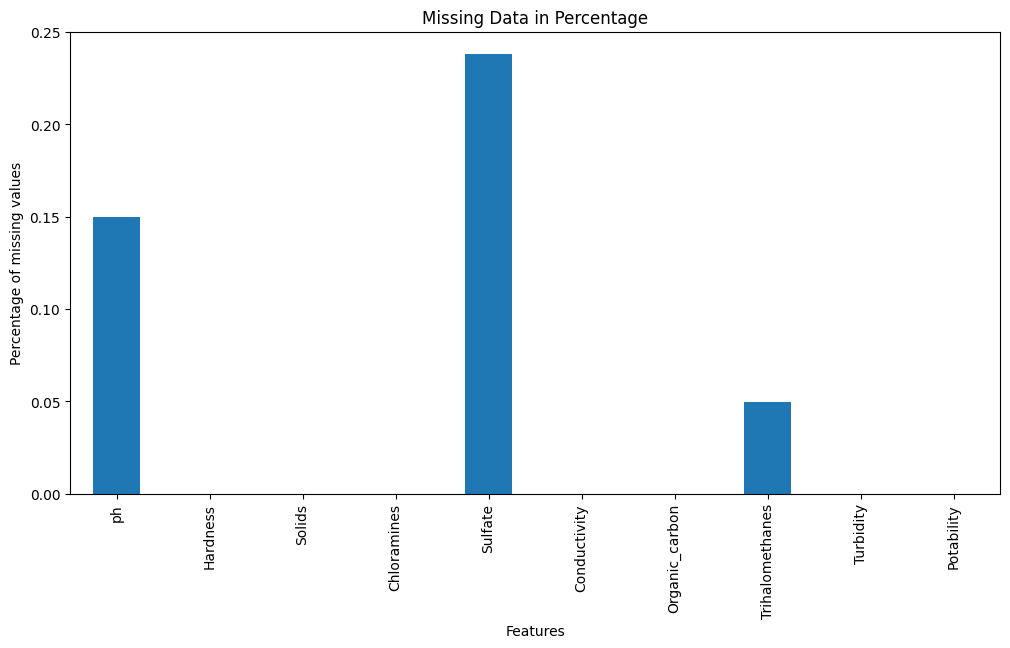

In [125]:
#Checking the percentage of missing values

df.isnull().mean().plot.bar(figsize = (12, 6))
plt.title('Missing Data in Percentage')
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')

<AxesSubplot: >

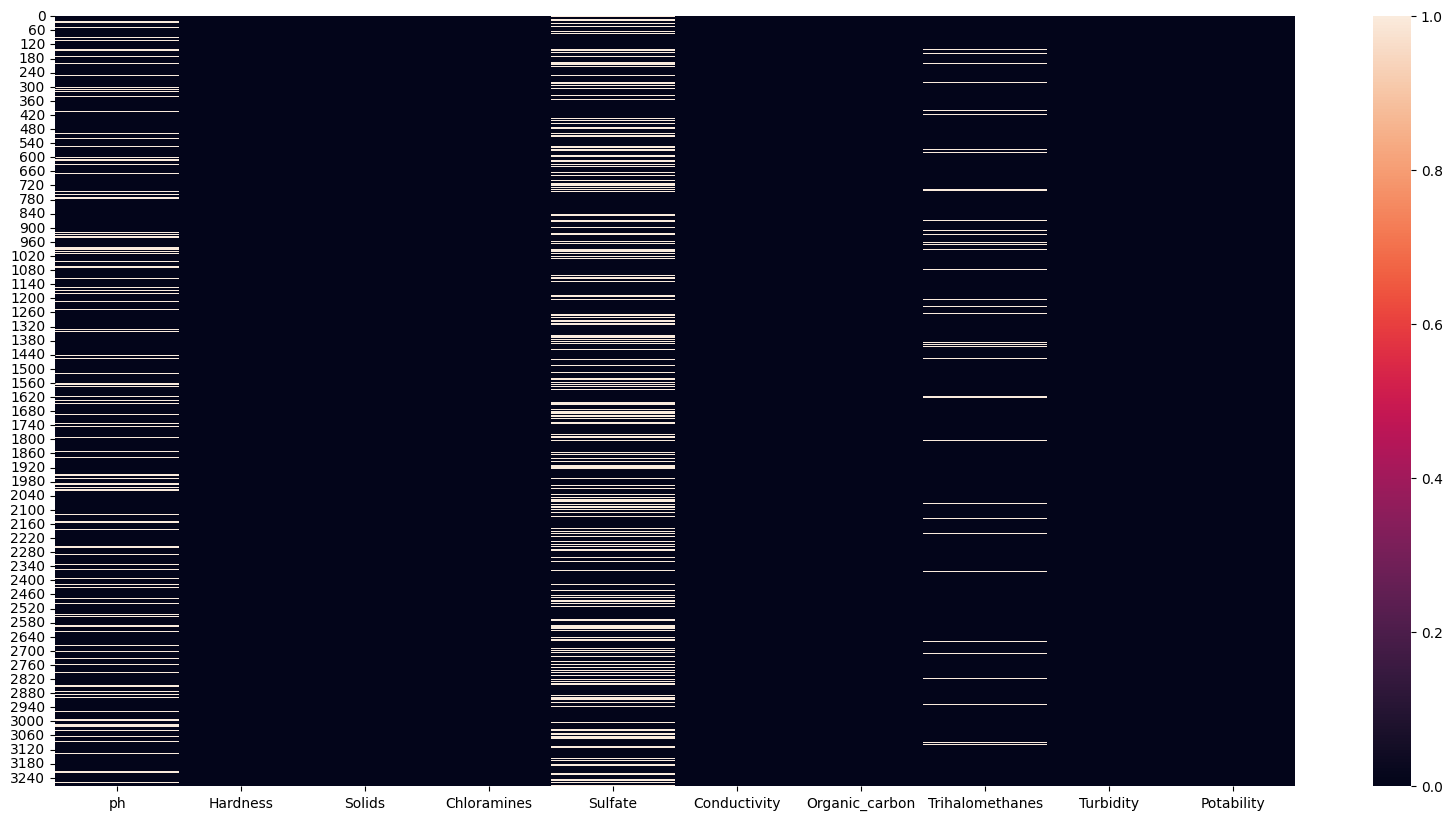

In [126]:
#Missing data display

import seaborn as sns

sns.heatmap(df.isna())

In [127]:

# Filling the missing values of the feature 'Trihalomethanes' with the mean considering that it has a normal distribution
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(),inplace=True)

<AxesSubplot: >

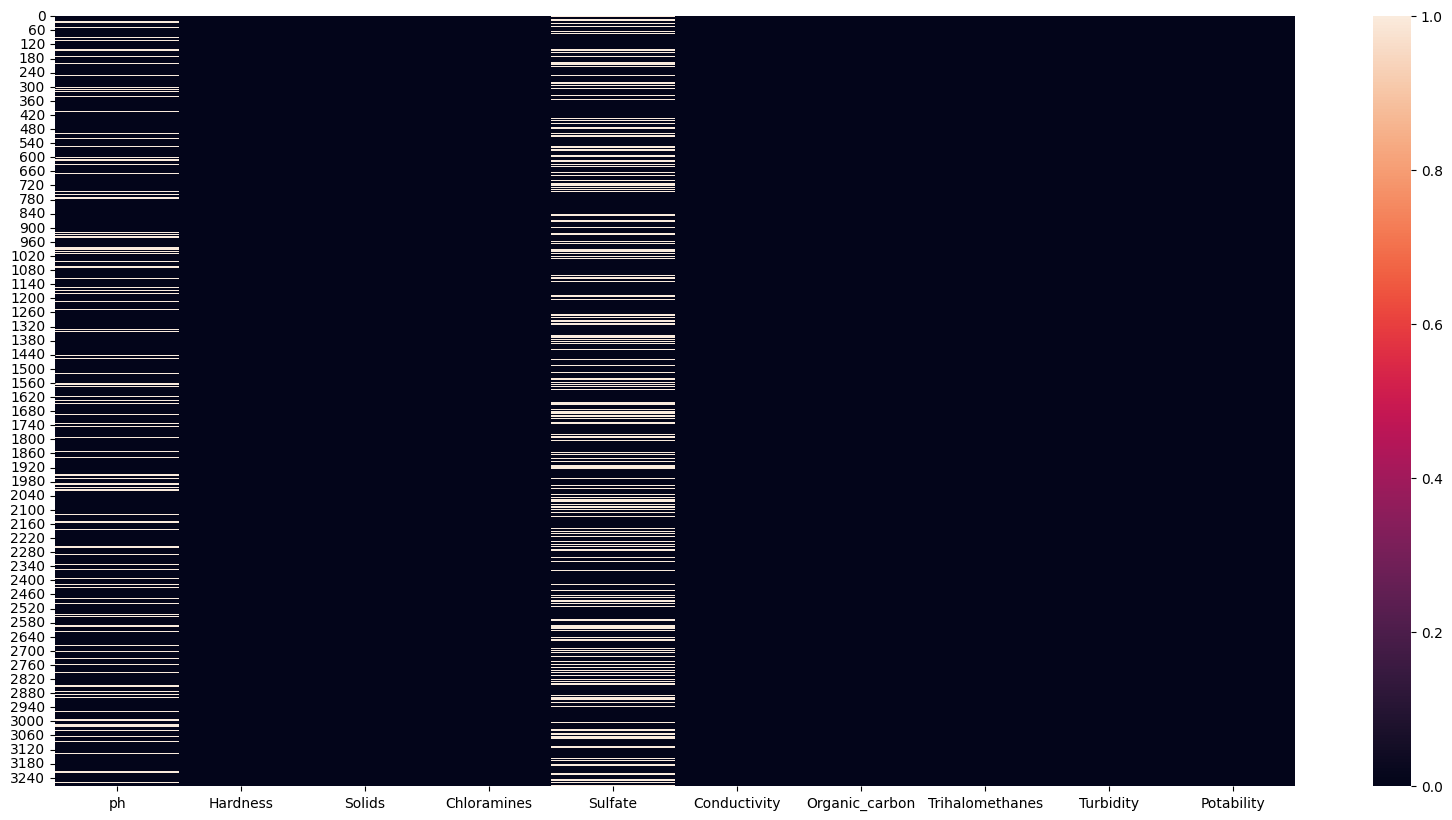

In [128]:
import seaborn as sns

sns.heatmap(df.isna())

### Correlation between features

In [129]:
corr = df.corr

<AxesSubplot: >

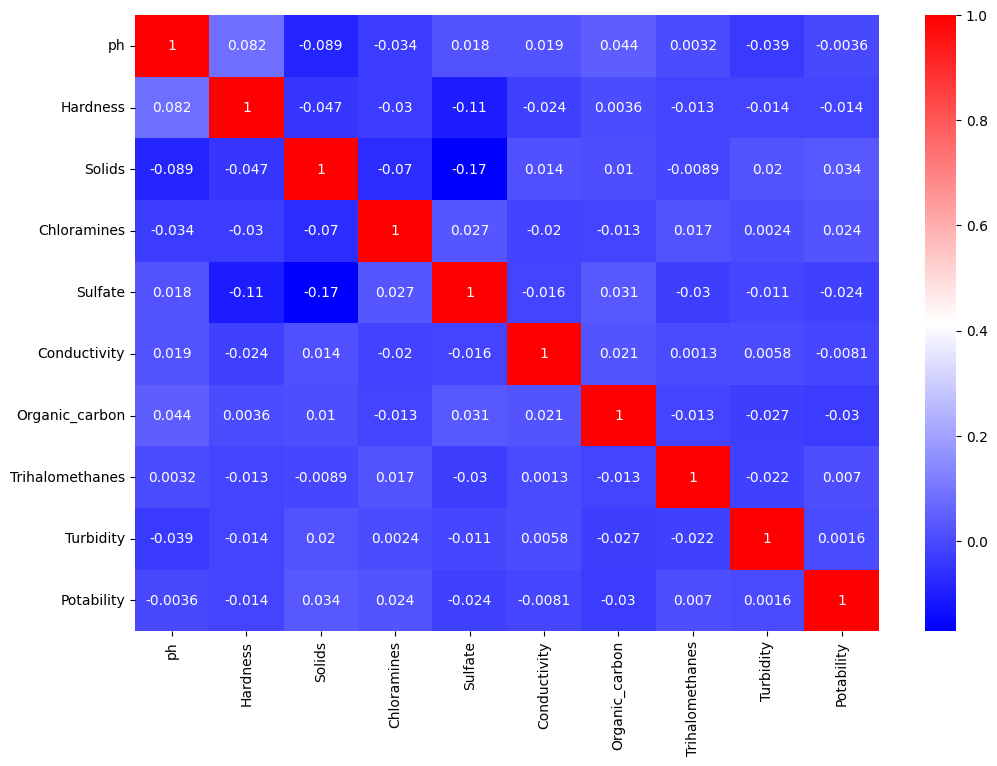

In [130]:
##Visualization of the correlation matrix between features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cbar = True,annot = True,cmap = 'bwr')

### Nan filling (of "ph" and "sulfate" features) by prediction for better accuracy following observation on the amount of Nan present

In [131]:
# Sorting of "ph" to be able to identify the test portion. 

df_sort_ph = df.sort_values("ph")

<AxesSubplot: >

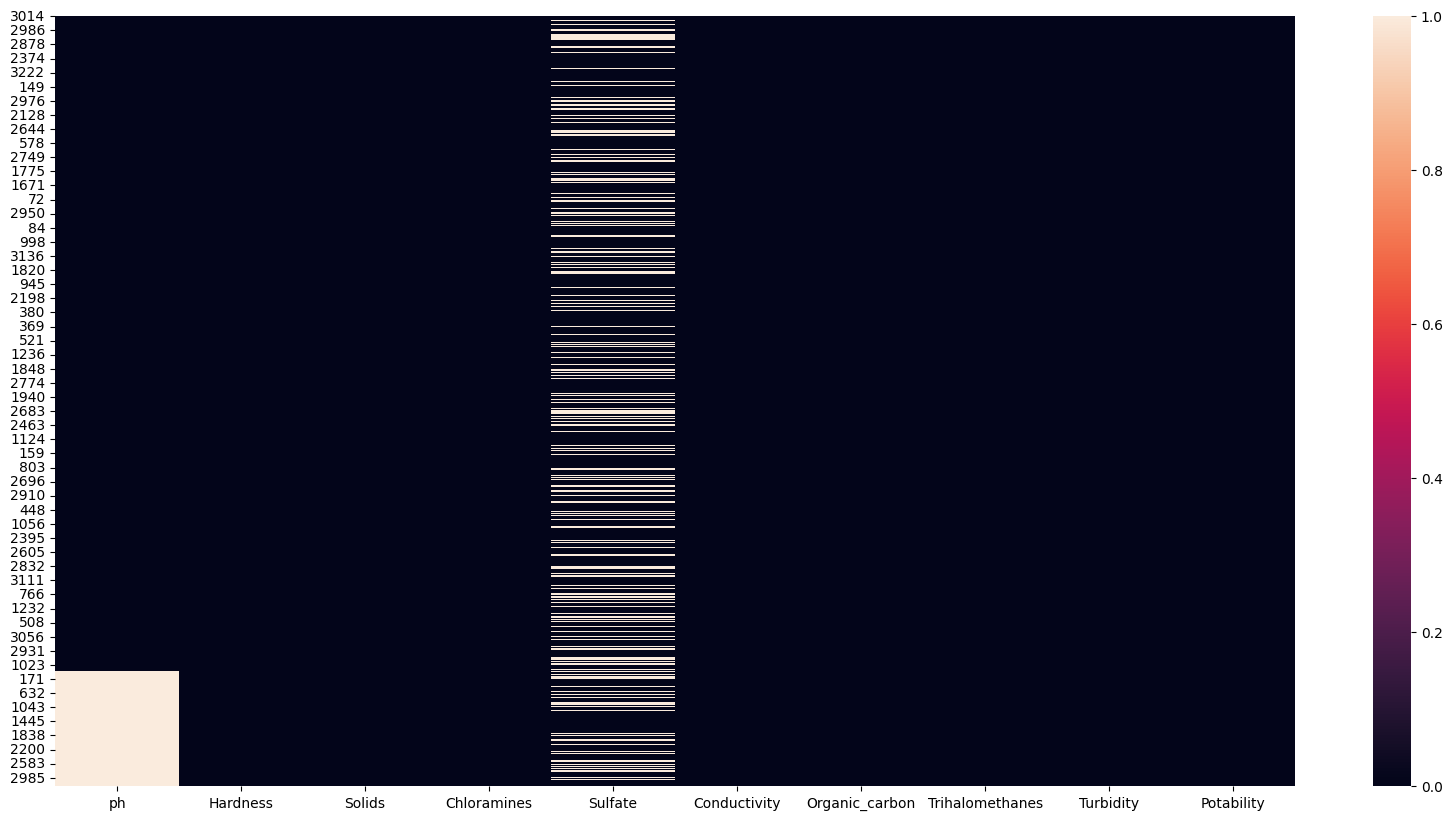

In [132]:
import seaborn as sns

sns.heatmap(df_sort_ph.isna())

# The prediction will be about Nan's block of the "ph" feature

### SPLITTING (Manuale)

In [133]:
# The "Sulfate" feature is not considered for ph prediction due to the high presence of Nan

X_train = df_sort_ph.loc[:2075]
y_train = X_train['ph']
X_train.drop(['Sulfate','ph'],axis=1,inplace=True)
X_test = df_sort_ph.loc[0:].drop(['Sulfate','ph'],axis=1)

C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\3661754260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['Sulfate','ph'],axis=1,inplace=True)


In [134]:
X_train

Hardness        Solids  Chloramines  Conductivity  Organic_carbon  \
3014  214.846144  49456.587108     7.897539    583.448849        7.702328   
726   152.530111  39028.599340     3.462492    443.029232       13.201943   
2928  221.204114  31145.110739     7.615583    439.112765       21.145954   
810   133.216942  16922.853899     9.293289    322.291191       10.430076   
2899  228.130383  12937.246891     6.214773    495.379883       12.033344   
...          ...           ...          ...           ...             ...   
1303  217.368014  11318.140563     8.465160    347.653054        9.762505   
263    47.432000  19237.949676     8.907020    500.245952       12.083896   
2895  152.776455  18464.900775     6.717973    450.846369       17.192564   
2868  187.606792  13475.912773     6.756055    411.264465       15.142667   
2075  235.677458  24008.992040     5.635029    460.745267       13.452538   

      Trihalomethanes  Turbidity  Potability  
3014        77.712891   4.928840           0  
726         62.322711   3.545741           1  
2928        66.396293   2.533996           0  
810         43.578466   5.160604           1  
2899        61.141119   4.948443           0  
...               ...        ...         ...  
1303        73.832405   3.533243           0  
263         66.396293   4.106924           1  
2895        85.883523   2.531075           0  
2868        74.448559   3.529191           0  
2075        72.859468   3.170994           0  

[2785 rows x 8 columns]

In [135]:
X_test

Hardness        Solids  Chloramines  Conductivity  Organic_carbon  \
0     204.890455  20791.318981     7.300212    564.308654       10.379783   
8     118.988579  14285.583854     7.804174    389.375566       12.706049   
13    150.174923  27331.361962     6.838223    379.761835       19.370807   
20    227.435048  22305.567414    10.333918    554.820086       16.331693   
22    215.977859  17107.224226     5.607060    436.256194       14.189062   
...          ...           ...          ...           ...             ...   
3224  198.218700  31081.735264     7.419106    517.925946       11.711419   
3229  203.204659  10643.186771     6.828936    384.597711       16.011328   
3231  225.754109  28194.452646     5.892830    418.272901       17.306832   
3245  188.536608  24711.414927     7.129520    555.548534       16.959269   
3260  134.736856   9000.025591     9.026293    428.213987        8.668672   

      Trihalomethanes  Turbidity  Potability  
0           86.990970   2.963135           0  
8           53.928846   3.595017           0  
13          76.509996   4.413974           0  
20          45.382815   4.133423           0  
22          59.855476   5.459251           0  
...               ...        ...         ...  
3224        85.428785   3.345543           1  
3229        72.911573   3.065910           1  
3231       103.912548   3.855895           1  
3245        56.038702   4.331691           1  
3260        74.773392   3.699558           1  

[491 rows x 8 columns]

In [136]:
y_train

3014     0.000000
726      0.227499
2928     0.975578
810      0.989912
2899     1.431782
          ...    
1303    12.246928
263     13.175402
2895    13.349889
2868    13.541240
2075    14.000000
Name: ph, Length: 2785, dtype: float64

tutte    |   ph
feature  |
--------------------------
X_train  | y_train
         |
X_test   |  y_pred

In [137]:
# percentage calculation of tests on the dataset
perc = X_test.shape[0] / (X_test.shape[0]+X_train.shape[0])
print( f"Percentuale valori test: {perc*100:.2f}%")

Percentuale valori test: 14.99%


### Model creation prediction of missing "ph" values from the dataset

In [138]:
lr = GradientBoostingRegressor(n_estimators=2500, random_state=123)

In [139]:
scores = cross_val_score(lr, X_train, y_train,
                         scoring="r2",
                         cv=6, n_jobs=-1)   # 10 folds

print("R2 scores: ", np.round(scores, 4))
print("Average R2: ", np.round(np.mean(scores), 4))

R2 scores:  [-11.8085 -34.5247 -34.2671 -26.8217 -34.7669 -13.0675]
Average R2:  -25.8761


In [140]:
lr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=2500, random_state=123)

In [141]:
y_pred = lr.predict(X_test)

In [142]:
y_pred

array([ 7.49075391,  6.70694542,  6.91731076,  7.82545052,  7.54239668,
        5.93807303,  7.9634758 ,  5.14692072,  7.19794313,  7.90265546,
        7.95501545,  7.14471911,  7.41905972,  6.74710931,  5.92237749,
        6.51234519,  7.61253106,  8.09986085,  7.19756756,  7.42228015,
        7.54465935,  7.88596369,  7.26360184,  4.9932321 ,  6.66949206,
        6.10798301,  6.69629975,  7.42476905,  6.64641674,  8.0617387 ,
        7.24990977,  7.54096562,  8.09546155,  7.42531642,  6.56836786,
        6.70807219,  7.58100967,  5.42215531,  7.08628649,  7.10327873,
        6.0930081 ,  7.87078492,  4.64633408,  6.40410248,  7.08951713,
        6.54639226,  6.28659131,  6.19259201,  7.44424673,  5.95726606,
        6.40478521,  3.69874071,  7.60193934,  7.15255983,  7.34611771,
       10.28098515,  6.23717408,  6.15413713,  8.18418184,  7.60906009,
        7.45933853,  5.65855415,  7.30174314,  7.13157136,  7.80158639,
        6.02690365,  7.46329754,  6.60382223,  6.01576074,  7.32

In [143]:
df_sort_ph["ph"].loc[0:]= y_pred


C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\800167096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort_ph["ph"].loc[0:]= y_pred


<AxesSubplot: >

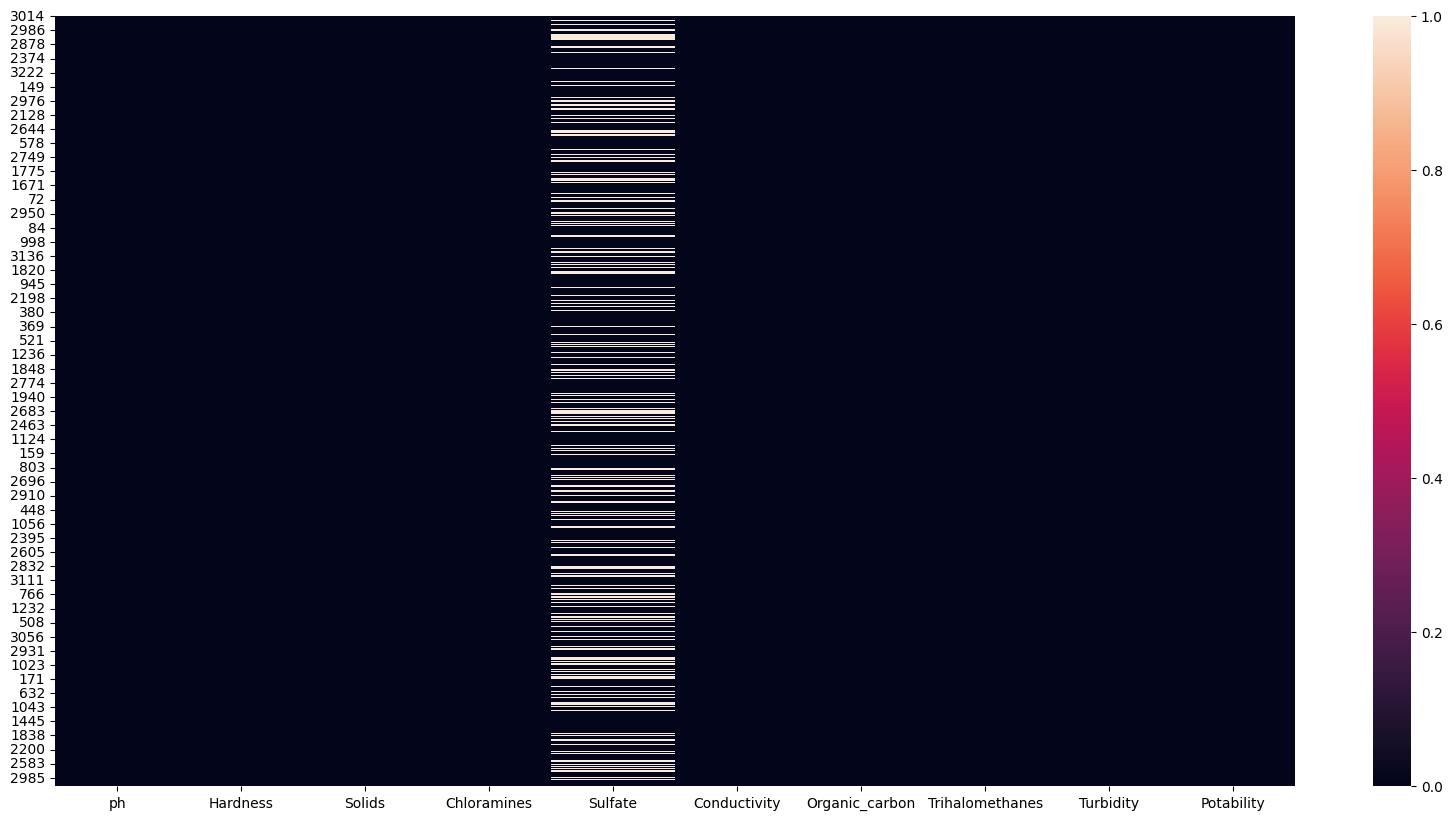

In [144]:
# Nan fill visualization within the "ph" feature

sns.heatmap(df_sort_ph.isna())


In [145]:
# Reordering the dataset according to the original indexes

df=df_sort_ph.sort_index()

In [146]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.490754  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

### Model creation prediction of missing "Sulfate" values from the dataset

In [147]:
# Repeating the same procedure used for "ph" prediction (this time for "Sulfate") using all features

df_sort_sulfate= df.sort_values("Sulfate")
df_sort_sulfate

ph    Hardness        Solids  Chloramines     Sulfate  \
1554  8.942046  215.673786  56488.672413     3.231438  129.000000   
275   5.324942  280.089655  35344.658047    13.043806  180.206746   
351   8.848586  188.919983  32033.332019    13.127000  182.397370   
253   6.800119  242.008082  39143.403329     9.501695  187.170714   
365   4.788861  234.893703  28174.620516    10.850036  187.424131   
...        ...         ...           ...          ...         ...   
3266  8.372910  169.087052  14622.745494     7.547984         NaN   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1554    541.915468        9.313771        70.828374   4.354288           1  
275     392.421496       10.504820        55.084668   4.427138           1  
351     479.791975       12.070444        77.671337   4.014682           1  
253     376.456593       11.432466        73.777275   3.854940           1  
365     444.854321       11.784799        89.010974   2.896852           1  
...            ...             ...              ...        ...         ...  
3266    464.525552       11.083027        38.435151   4.906358           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

<AxesSubplot: >

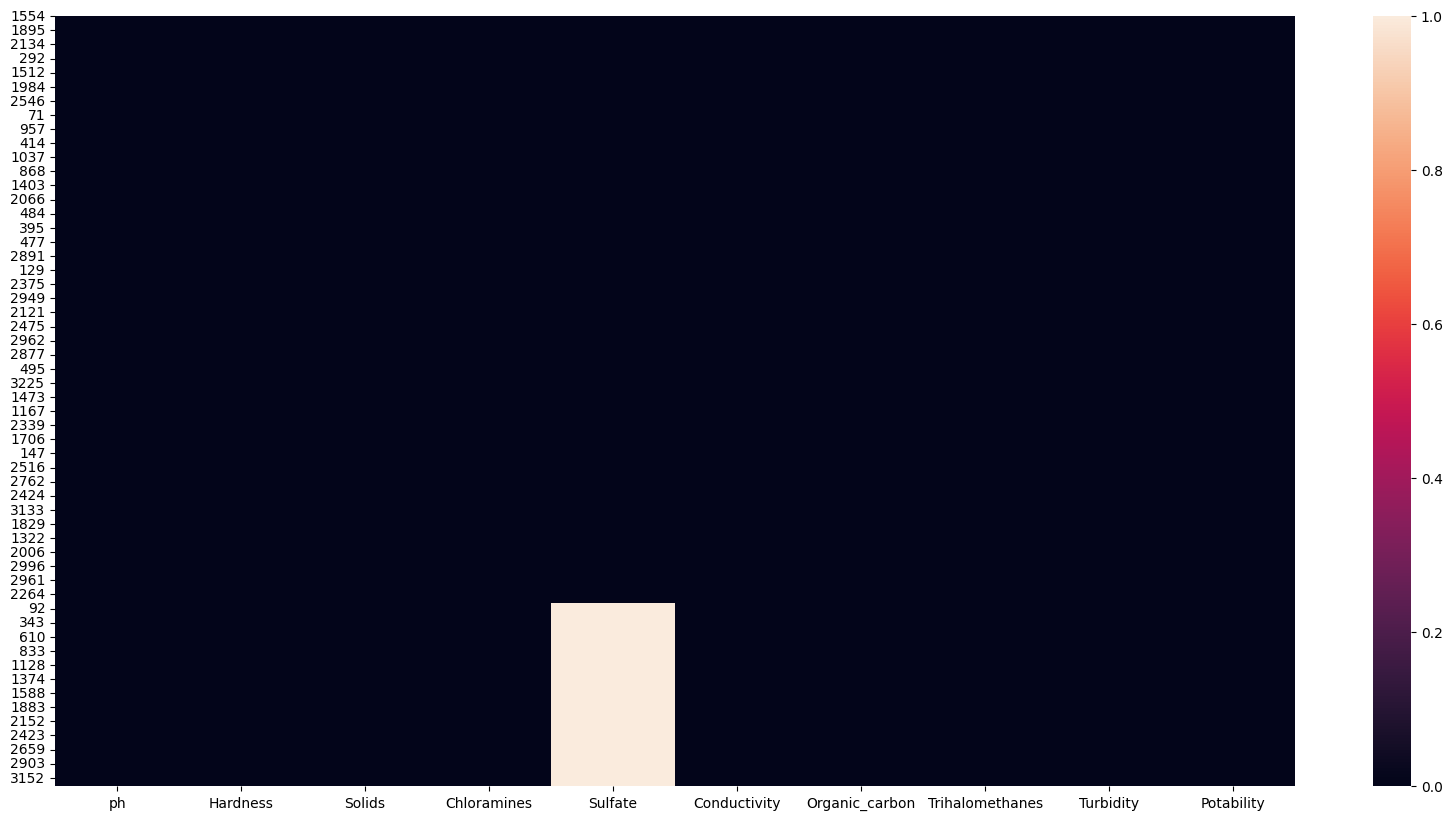

In [148]:
sns.heatmap(df_sort_sulfate.isna())

In [149]:
df_sort_sulfate.loc[3116:]

ph    Hardness        Solids  Chloramines     Sulfate  \
3116  5.230003  176.714023  27971.891806     7.597981  413.914001   
346   4.296247  278.147524  19672.487213     4.955218  414.636726   
1859  7.480728  117.057314  28357.942774     4.702821  414.855784   
769   5.729303  162.857585  34573.678786     5.654856  415.287072   
1784  9.252857  168.040751  50279.262429     5.905056  415.450810   
...        ...         ...           ...          ...         ...   
3266  8.372910  169.087052  14622.745494     7.547984         NaN   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3116    440.355374       14.423614        72.837370   3.045612           0  
346     330.067379       11.293187        70.665540   4.163329           1  
1859    472.059339       18.340212        76.344581   3.714875           0  
769     297.631365       13.990842        76.744677   3.556395           1  
1784    400.003589       11.949854        62.256881   3.300586           0  
...            ...             ...              ...        ...         ...  
3266    464.525552       11.083027        38.435151   4.906358           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[863 rows x 10 columns]

In [150]:
### Manual Splitting on Sulfate

In [151]:
X_train = df_sort_sulfate.loc[:2318]
y_train = X_train['Sulfate']
X_train.drop('Sulfate',axis=1,inplace=True)
X_test = df_sort_sulfate.loc[1:].drop(["Sulfate"],axis=1)

C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\2612923002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop('Sulfate',axis=1,inplace=True)


In [152]:
X_train

ph    Hardness        Solids  Chloramines  Conductivity  \
1554  8.942046  215.673786  56488.672413     3.231438    541.915468   
275   5.324942  280.089655  35344.658047    13.043806    392.421496   
351   8.848586  188.919983  32033.332019    13.127000    479.791975   
253   6.800119  242.008082  39143.403329     9.501695    376.456593   
365   4.788861  234.893703  28174.620516    10.850036    444.854321   
...        ...         ...           ...          ...           ...   
1743  8.895574  107.383327  27622.746268     6.163320    444.929584   
1563  8.237317  195.540967   4142.499001     9.892703    435.418245   
1537  7.381758  203.460302   1372.091043    11.129154    361.342496   
1605  7.445189  150.775723   4168.196994    10.573403    355.578481   
2318  5.057736  137.689344  11229.137777     6.411410    580.095225   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
1554        9.313771        70.828374   4.354288           1  
275        10.504820        55.084668   4.427138           1  
351        12.070444        77.671337   4.014682           1  
253        11.432466        73.777275   3.854940           1  
365        11.784799        89.010974   2.896852           1  
...              ...              ...        ...         ...  
1743       13.995136        78.348415   4.754235           0  
1563       15.846048        66.396293   3.612919           1  
1537       16.548438        55.132546   3.338022           1  
1605       15.352425        74.760976   2.745804           1  
2318       15.390304        43.882514   3.163936           1  

[2495 rows x 9 columns]

In [153]:
lr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=2500, random_state=123)

In [154]:
y_pred = lr.predict(X_test)

In [155]:
y_pred

array([315.69612069, 330.29864502, 338.16034931, 321.23628196,
       382.45766874, 350.21468855, 321.00355518, 321.67688687,
       317.44325547, 342.80479947, 328.93151058, 331.67518303,
       329.86858836, 299.79486533, 350.39516669, 334.2153894 ,
       358.74224096, 350.68335932, 331.07565812, 362.76479485,
       355.13558203, 329.99757134, 360.69344495, 338.39853466,
       356.86183005, 334.46971503, 312.27026758, 289.63641432,
       329.68440041, 245.76617899, 262.99605997, 293.34147511,
       291.8974478 , 333.90777596, 323.71118771, 333.8316418 ,
       342.8820235 , 350.23513463, 339.95312544, 384.91911639,
       298.11829112, 289.49205099, 359.99891751, 333.57717336,
       317.29408994, 311.32559603, 356.83360953, 334.49021036,
       335.91212819, 347.22569932, 303.89709607, 352.85830554,
       326.71921176, 377.58722964, 352.21949146, 312.50822529,
       341.3143962 , 318.61760861, 328.57453181, 342.18060496,
       361.27204531, 361.57143575, 349.38632851, 348.03

In [156]:
df_sort_sulfate["Sulfate"].loc[1:]= y_pred


C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\3995450656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort_sulfate["Sulfate"].loc[1:]= y_pred


<AxesSubplot: >

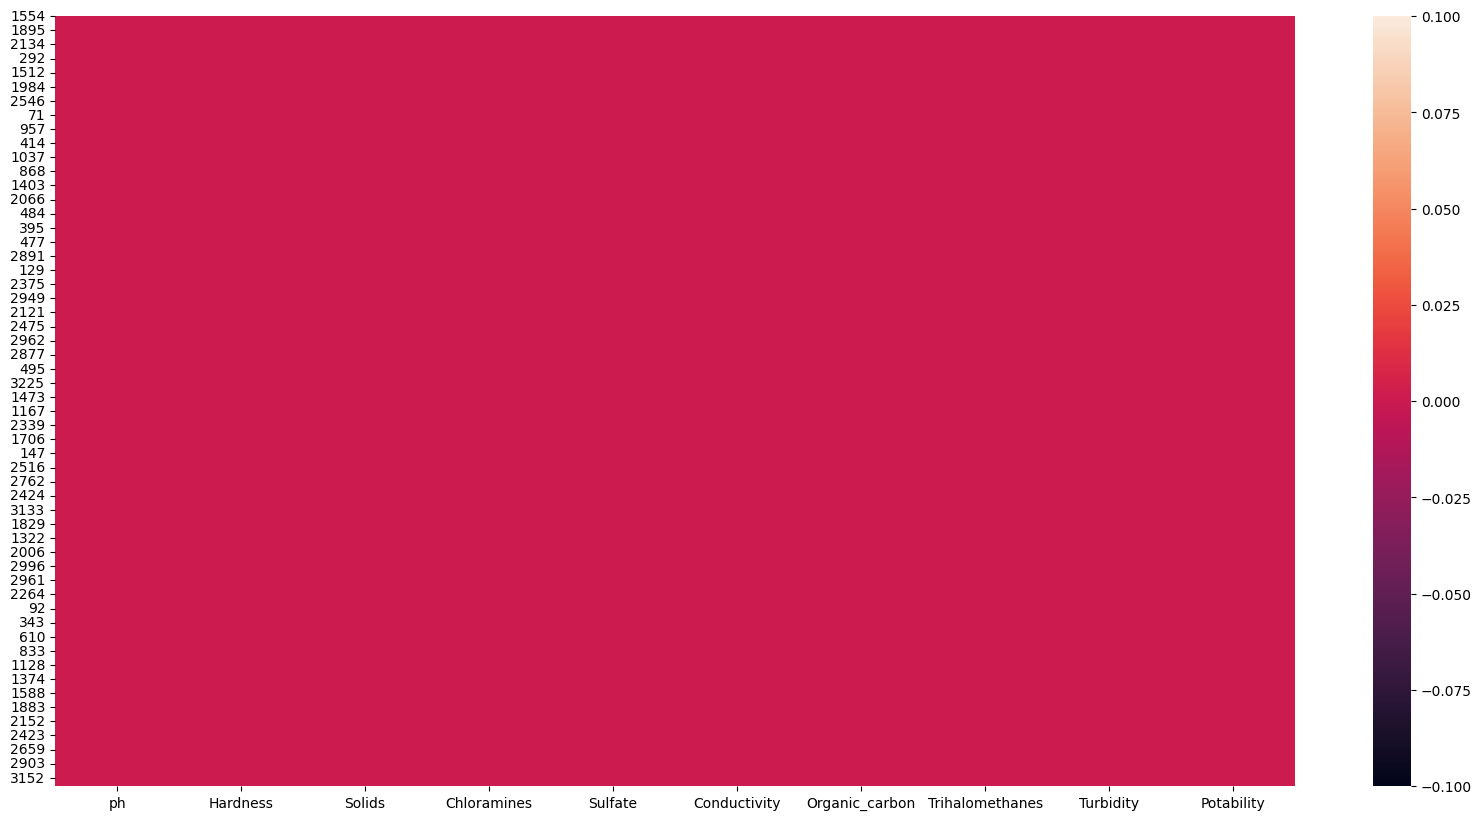

In [157]:
sns.heatmap(df_sort_sulfate.isna())

In [158]:
df=df_sort_sulfate.sort_index()
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.490754  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  315.696121   
2     8.099124  224.236259  19909.541732     9.275884  330.298645   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  352.103280   
3273  9.419510  175.762646  33155.578218     7.350233  288.399212   
3274  5.126763  230.603758  11983.869376     6.303357  348.246001   
3275  7.874671  195.102299  17404.177061     7.509306  341.328111   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [159]:
df.to_csv("water")

# Data Cleaning

### Pulizia degli outliers dalla feature 

In [160]:
#  Detection of outliers in the feature "Solids"" using the 3-Standard Deviation method

upper_sol=df['Solids'].mean() + 3*df['Solids'].std()
lower_sol=df['Solids'].mean() - 3*df['Solids'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_sol,lower_sol))

Upper Limit is 48319.80500943489 and Lower Limit is -4291.619957280676


In [161]:
# Removal of outliers

df=df[(df['Solids']>=lower_sol)&(df['Solids']<=upper_sol)]

In [162]:
df.shape

(3256, 10)

## Standardization

In [163]:
x = df.drop(['Potability'], axis='columns')
y = df.Potability
from sklearn.preprocessing import MinMaxScaler


features_scaler = MinMaxScaler()
features = features_scaler.fit_transform(x)
features

array([[0.52737371, 0.57113901, 0.42750618, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.25330047, 0.29740043, 0.3823701 , ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57154653, 0.64131081, 0.40909102, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.66741773, 0.46548556, 0.68572308, ..., 0.33866167, 0.56065454,
        0.34956996],
       [0.35572797, 0.66440723, 0.24357018, ..., 0.34363779, 0.62265916,
        0.61611996],
       [0.55524936, 0.53563505, 0.35676863, ..., 0.5341137 , 0.63247754,
        0.16244074]])

# Modeling

### Cross Validation and Hyperparameter Tuning

In [164]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30,50],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [60,80,100,110,130,150],
            'max_depth': [3, 5, 7, 9]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params' : {
            'n_estimators': [50,80,100,120],
            'max_depth': [3,5,6,8]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,7,11,13]
        }
    }
    
}

The prediction can fall into one of only two classes (0,1), so it is a binary classification model.
The following metrics will then be displayed: score, precision, recall, f1-score.
F1-score is the harmonic mean of precision and recall. It combines precision and recall into a single value.

In [165]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(features, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

model  best_score                           best_params
0                  svm    0.632370            {'C': 50, 'kernel': 'rbf'}
1        random_forest    0.655108  {'max_depth': 9, 'n_estimators': 80}
2              XGBoost    0.639139  {'max_depth': 3, 'n_estimators': 50}
3  logistic_regression    0.611487                              {'C': 1}
4                  KNN    0.615483                   {'n_neighbors': 11}

### In this way, we can easily compare and evaluate the performance of the models and then choose the model that offers the best performance for our specific problem.

(0.0, 0.8)

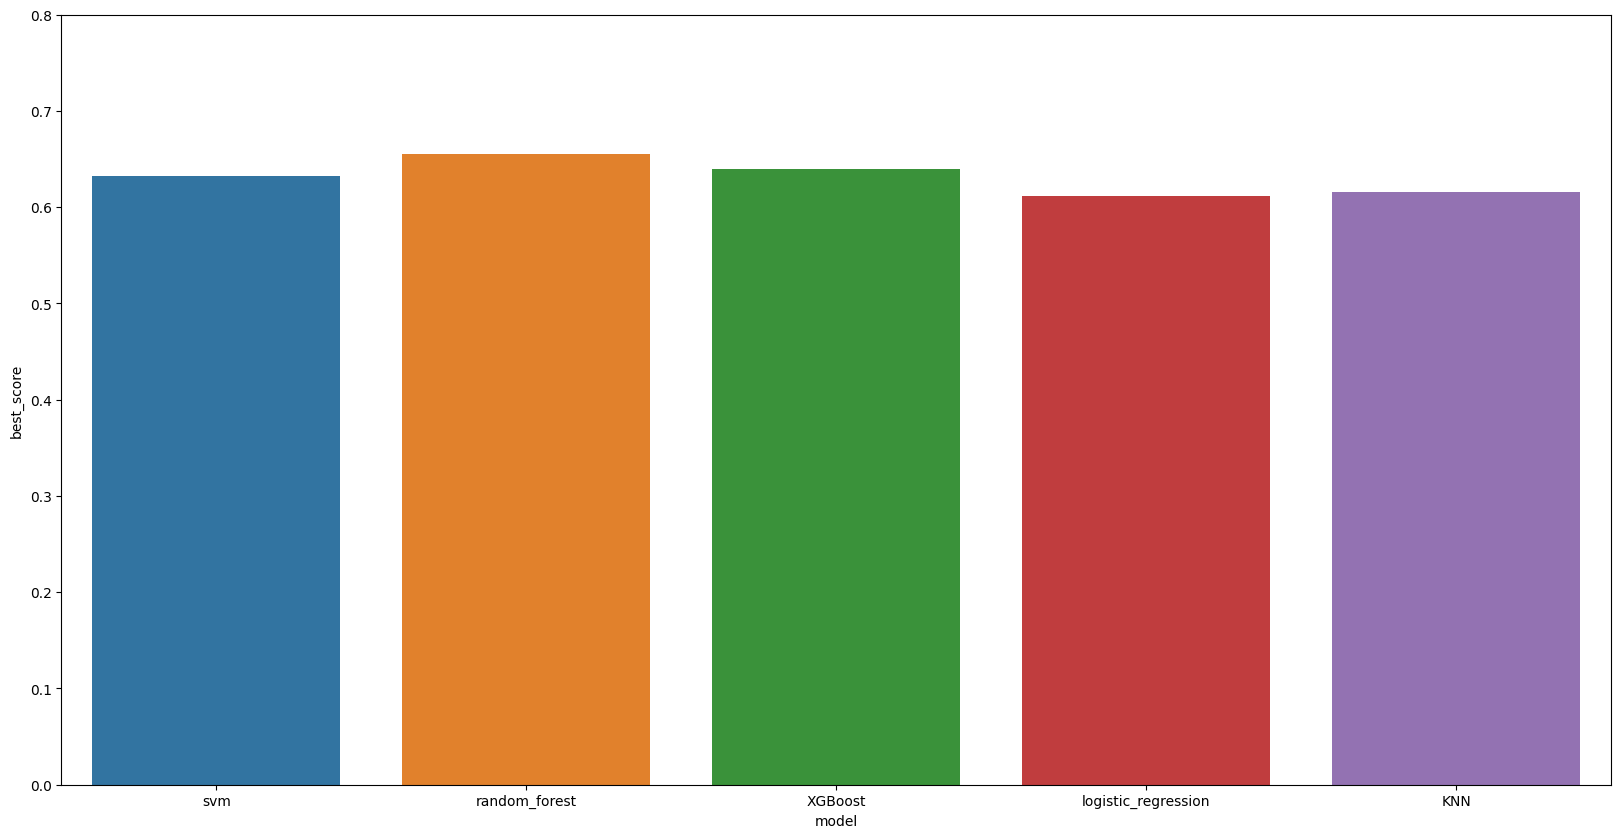

In [166]:
sns.barplot(x="model", y="best_score", data=df_score)
plt.ylim(0, 0.8)

In [167]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.25, random_state=101)

In [168]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

Visualization of model results without Hyperparameter Tuning

In [169]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(), XGBClassifier()]
scores = dict()

for m in models:
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       510
           1       0.67      0.36      0.46       304

    accuracy                           0.69       814
   macro avg       0.68      0.62      0.62       814
weighted avg       0.69      0.69      0.66       814

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.68      0.78      0.72       510
           1       0.50      0.37      0.43       304

    accuracy                           0.63       814
   macro avg       0.59      0.58      0.57       814
weighted avg       0.61      0.63      0.61       814

------------------------------ 

model: SVC()
              precision    recall  f1-score   support

           0       0.68      0.93      0.79       510
           1       0.70      0.26      0.38       304

    accuracy                           0.

Displaying the results of the top 2 algorithms

In [170]:
row_score_max = df_score['best_score'].argmax()
df_score.loc[[row_score_max]]

model  best_score                           best_params
1  random_forest    0.655108  {'max_depth': 9, 'n_estimators': 80}

In [171]:
model = RandomForestClassifier(max_depth=9, n_estimators=110)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6867321867321867

Text(0.5, 47.7222222222222, 'Predicted')

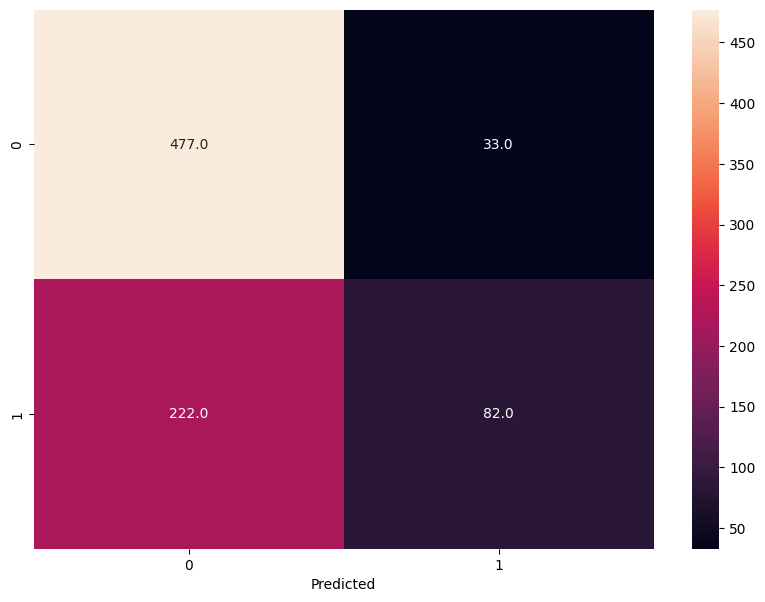

In [172]:
from sklearn.metrics import confusion_matrix


y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')

In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       510
           1       0.71      0.27      0.39       304

    accuracy                           0.69       814
   macro avg       0.70      0.60      0.59       814
weighted avg       0.69      0.69      0.64       814



In [174]:
model = XGBClassifier(max_depth=3, n_estimators=50)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.671990171990172

Text(0.5, 47.7222222222222, 'Predicted')

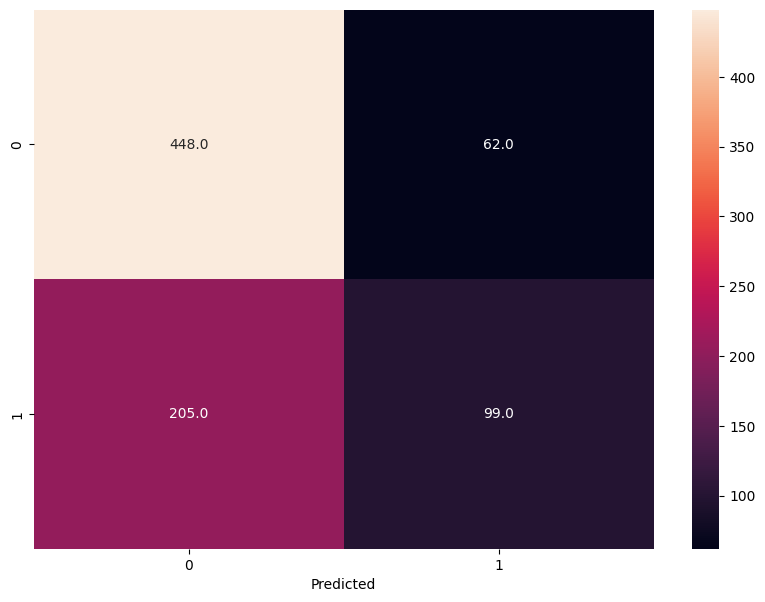

In [175]:
from sklearn.metrics import confusion_matrix


y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')

In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       510
           1       0.61      0.33      0.43       304

    accuracy                           0.67       814
   macro avg       0.65      0.60      0.60       814
weighted avg       0.66      0.67      0.64       814



Management of data imbalance using SMOTE

In [177]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(features, y)

y_sm.value_counts()

0    1990
1    1990
Name: Potability, dtype: int64

In [178]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_sm, y_sm)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score_smote = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score_smote

model  best_score                            best_params
0                  svm    0.583417             {'C': 50, 'kernel': 'rbf'}
1        random_forest    0.654271  {'max_depth': 9, 'n_estimators': 110}
2              XGBoost    0.704020  {'max_depth': 8, 'n_estimators': 120}
3  logistic_regression    0.505528                              {'C': 10}
4                  KNN    0.686181                     {'n_neighbors': 3}

(0.0, 0.8)

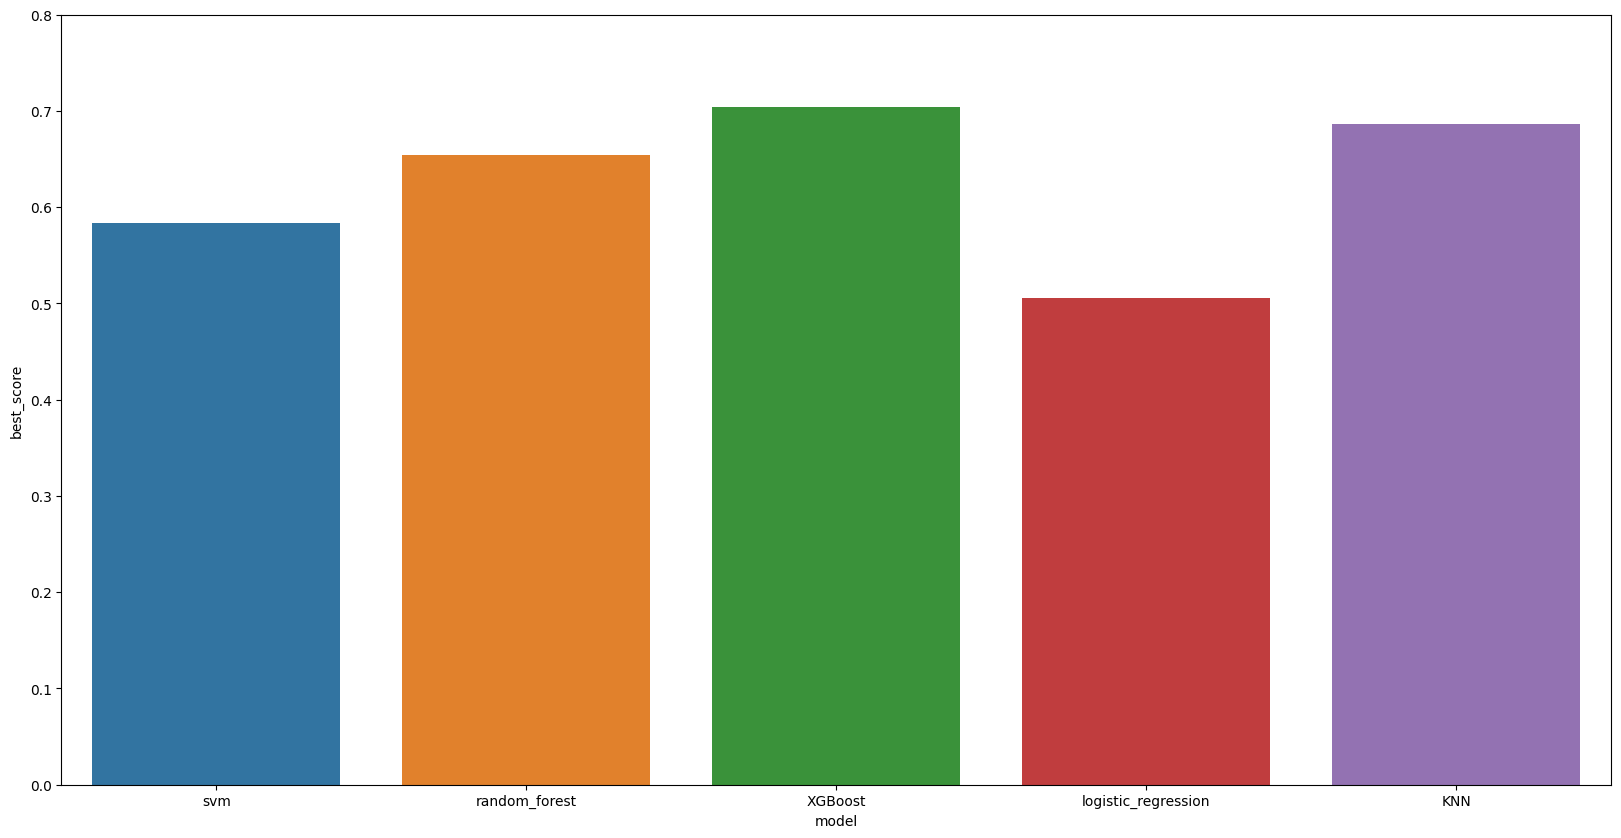

In [179]:
sns.barplot(x="model", y="best_score", data=df_score_smote)
plt.ylim(0, 0.8)

In [180]:
model = RandomForestClassifier(max_depth=9, n_estimators=150)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6781326781326781

Text(0.5, 47.7222222222222, 'Predicted')

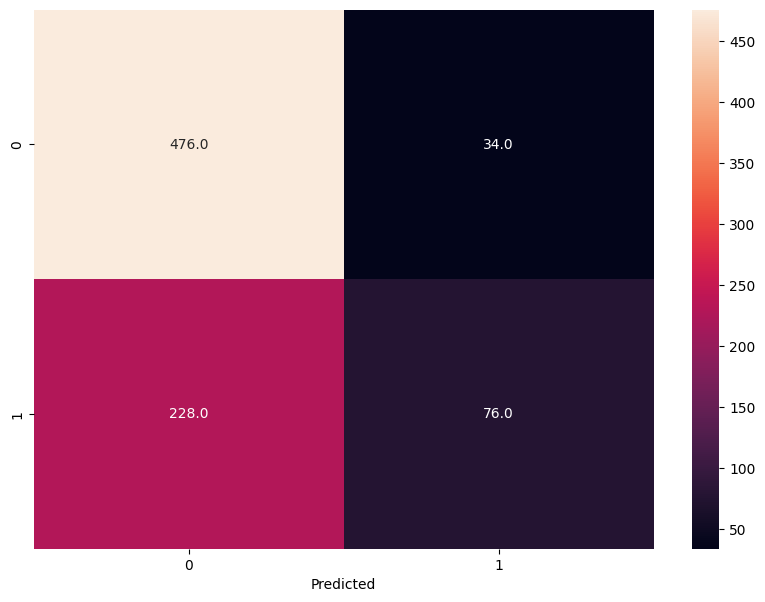

In [181]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')

In [182]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.68      0.93      0.78       510
           1       0.69      0.25      0.37       304

    accuracy                           0.68       814
   macro avg       0.68      0.59      0.58       814
weighted avg       0.68      0.68      0.63       814



In [183]:
model = XGBClassifier(max_depth=8, n_estimators=120)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6732186732186732

Text(0.5, 47.7222222222222, 'Predicted')

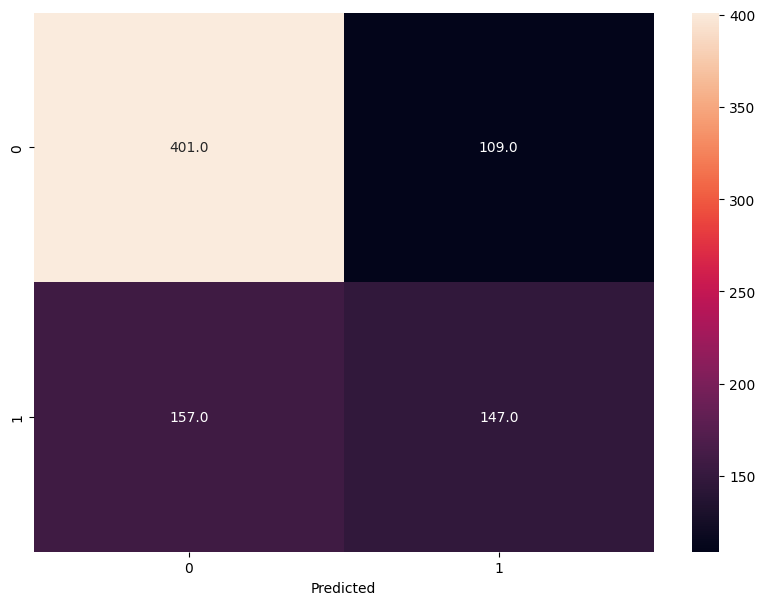

In [184]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')

In [185]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       510
           1       0.57      0.48      0.53       304

    accuracy                           0.67       814
   macro avg       0.65      0.63      0.64       814
weighted avg       0.66      0.67      0.67       814



# Conclusioni

In [186]:
### - The RandomForest gave us an accuracy of 68%.
### - The accuracy is low because the features are not correlated with the target.
### - Random Forest and XGBoost are the best algorithms for model train.
### - Solids levels seem to contain some discrepancy because its values are on average 40 times higher than the upper (desirable) limit for safe drinking water. (The desirable limit for TDS is 500 mg/l and the upper limit is 1000 mg/l prescribed for drinking purposes .)